In [86]:
# Noah: personal work on Project 1, Number 1
### Imports ###
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [87]:
### Eigenfunctions and Eigenvalues ###
def eigenvalue(n):
    return 1 / ((n-0.5)**2 * np.pi**2)

def eigenfunc(x, lambda_n):
    return np.sqrt(2)*np.sin(x / np.sqrt(lambda_n))

### Alpha Bar ###

def alpha_bar(x):
    return (1/8) * (x+1)**2

eigenvalue_vect = np.vectorize(eigenvalue)

# N : number of terms in the expansion
def karhunen_loeve(N, xs):
    s = 0
    for n in np.arange(1,N+1):
        lambda_n = eigenvalue(n)
        s += np.sqrt(lambda_n) * eigenfunc(xs, lambda_n) * np.random.normal(0,1)
    s += alpha_bar(xs)
    return s

In [88]:
### Plot 1st Three Eigenvalues/Eigenfunctions ###
N_xs = 100
xs = np.linspace(0,1,N_xs)
karhunen_loeve(3,xs)

array([ 0.125     ,  0.09574592,  0.06657996,  0.03756445,  0.00876117,
       -0.0197689 , -0.04796589, -0.07577124, -0.10312799, -0.12998105,
       -0.15627734, -0.18196612, -0.20699914, -0.23133084, -0.25491853,
       -0.27772259, -0.29970656, -0.32083734, -0.34108525, -0.36042414,
       -0.37883149, -0.39628844, -0.41277984, -0.42829427, -0.44282404,
       -0.45636515, -0.4689173 , -0.48048377, -0.49107139, -0.50069042,
       -0.50935447, -0.51708034, -0.52388788, -0.52979984, -0.53484173,
       -0.53904157, -0.54242976, -0.54503883, -0.54690326, -0.54805922,
       -0.54854438, -0.54839768, -0.54765905, -0.54636921, -0.54456944,
       -0.54230132, -0.53960649, -0.53652644, -0.5331023 , -0.52937457,
       -0.52538295, -0.52116613, -0.51676158, -0.51220539, -0.5075321 ,
       -0.50277451, -0.49796359, -0.4931283 , -0.48829551, -0.48348989,
       -0.47873384, -0.4740474 , -0.46944821, -0.46495151, -0.46057008,
       -0.45631425, -0.45219194, -0.44820868, -0.44436764, -0.44

In [89]:
#N_realizations = 1000
def beta(xs,N_realizations, N_terms):
    r = np.zeros( (N_realizations, len(xs)) )
    for i in range(0,N_realizations):
        r[i] = karhunen_loeve(N_terms,xs)
    return r

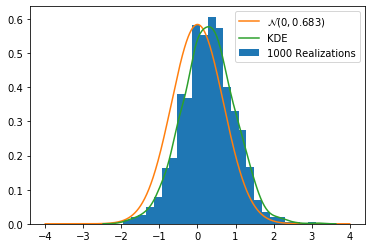

In [106]:
import scipy
fig = plt.figure()
ax = plt.subplot(111)
rs =beta(np.array([0.5]),1000, 3).flatten()

plt.hist( rs, density=True, stacked=True, bins=25, label="1000 Realizations")

var = 0
for n in np.arange(1,4):
    lambda_n = eigenvalue(n)
    var += ( (lambda_n) * eigenfunc(0.5, lambda_n)**2 ) #note: var(X_i) = 1, as this is the variance of Q_n!

sd = np.sqrt(var)
gaussian_range = np.linspace(-4,4,1000)
approx_pdf = scipy.stats.norm.pdf(gaussian_range, loc=0, scale=sd)
plt.plot(gaussian_range, approx_pdf, label = r"$\mathcal{N}(0, %.3f)$" % sd)
sns.kdeplot(rs, label = "KDE")

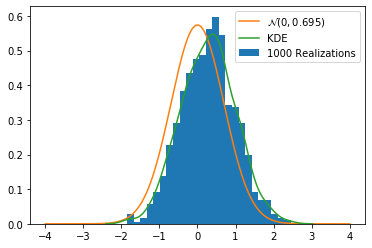

In [110]:
## lazy-- just copied code in previous cell, changed N to 6

import scipy
fig = plt.figure()
ax = plt.subplot(111)
rs =beta(np.array([0.5]),1000, 6).flatten()

plt.hist( rs, density=True, stacked=True, bins=25, label="1000 Realizations")

var = 0
for n in np.arange(1,7):
    lambda_n = eigenvalue(n)
    var += ( (lambda_n) * eigenfunc(0.5, lambda_n)**2 ) #note: var(X_i) = 1, as this is the variance of Q_n!

sd = np.sqrt(var)
gaussian_range = np.linspace(-4,4,1000)
approx_pdf = scipy.stats.norm.pdf(gaussian_range, loc=0, scale=sd)
plt.plot(gaussian_range, approx_pdf, label = r"$\mathcal{N}(0, %.3f)$" % sd)
sns.kdeplot(rs, label = "KDE")